In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
print('hello')
import sys, os
from datetime import datetime
print(os.getcwd())
sys.path.append('../')
from cognite.correlation.correlation import columns_by_max_cross_correlation
from cognite.client import CogniteClient
import pandas as pd
import numpy as np

client = CogniteClient(client_name='test-corr')
tags = pd.read_csv('val_11_pt_tags.csv', delimiter=';')


hello
/Users/marcel/Documents/github/correlation/examples


/Users/marcel/anaconda3/lib/python3.7/site-packages/cognite/client/_cognite_client.py:57: UserWarning: You are using version 1.0.2 of the SDK, however version 1.0.5 is available. Upgrade or set the environment variable 'COGNITE_DISABLE_PYPI_VERSION_CHECK' to suppress this warning.
  debug=debug,
/Users/marcel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Authenticated towards inferred project 'akerbp'. Pass project to the CogniteClient constructor or set the environment variable 'COGNITE_PROJECT' to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
# Write id to CSV
"""
tags['id'] = np.full(tags.shape[0], np.NaN, dtype=int)
print(tags.head())
for i, tag in enumerate(tags['CDF_TAG']):
    results = client.time_series.search(tag).to_pandas()
    for j in range(results.shape[0]):
        if results['name'][j] == tag:
            tags['id'][i] = results['id'][j]
            break
print(tags)
tags.to_csv('with_id.csv')
"""

"\ntags['id'] = np.full(tags.shape[0], np.NaN, dtype=int)\nprint(tags.head())\nfor i, tag in enumerate(tags['CDF_TAG']):\n    results = client.time_series.search(tag).to_pandas()\n    for j in range(results.shape[0]):\n        if results['name'][j] == tag:\n            tags['id'][i] = results['id'][j]\n            break\nprint(tags)\ntags.to_csv('with_id.csv')\n"

In [4]:
print(tags)


               Tag                      CDF_TAG                 CDF_TAG_Nabo  \
0    11-PIC-92205C  VAL_11-PIC-92205C:Z.X.Value   VAL_11-PT-92207:Z.X1.Value   
1      11-PT-92002      VAL_11-PT-92002:X.Value   VAL_11-PT-92006:Z.X1.Value   
2   11-PT-92006-01   VAL_11-PT-92006:Z.X1.Value      VAL_11-PT-92002:X.Value   
3   11-PT-92006-02   VAL_11-PT-92006:Z.X2.Value      VAL_11-PT-92002:X.Value   
4      11-PT-92012      VAL_11-PT-92012:X.Value   VAL_11-PT-92016:Z.X1.Value   
5   11-PT-92016-01   VAL_11-PT-92016:Z.X1.Value      VAL_11-PT-92012:X.Value   
6   11-PT-92016-02   VAL_11-PT-92016:Z.X2.Value      VAL_11-PT-92012:X.Value   
7     11-PT-92104A     VAL_11-PT-92104A:X.Value     VAL_11-PT-92104B:X.Value   
8     11-PT-92104B     VAL_11-PT-92104B:X.Value     VAL_11-PT-92104A:X.Value   
9      11-PT-92117      VAL_11-PT-92117:X.Value      VAL_11-PT-92118:X.Value   
10     11-PT-92118      VAL_11-PT-92118:X.Value      VAL_11-PT-92117:X.Value   
11     11-PT-92123      VAL_11-PT-92123:

In [5]:
"""
# Retrieve data from CDF using ids
df = client.datapoints.retrieve_dataframe(
    # id=tags['id'].to_list(),
    external_id=tags['CDF_TAG'].to_list(),
    start=datetime(2017, 1, 1),
    end=datetime(2018, 1, 1),
    granularity='1m',
    aggregates=['interpolation']
)
"""
# Retrieve data from CDF using ids
df = client.datapoints.retrieve_dataframe(
    # id=tags['id'].to_list(),
    external_id=tags['CDF_TAG'].to_list(),
    start=datetime(2018, 12, 11, 12, 0),
    end=datetime(2018, 12, 11, 13, 0),
    granularity='1s',
    aggregates=['interpolation']
)

print(df.head())

                     VAL_11-PIC-92205C:Z.X.Value|interpolation  \
2018-12-11 12:00:00                                   3.277639   
2018-12-11 12:00:01                                   3.294377   
2018-12-11 12:00:02                                   3.316281   
2018-12-11 12:00:03                                   3.338032   
2018-12-11 12:00:04                                   3.358149   

                     VAL_11-PT-92002:X.Value|interpolation  \
2018-12-11 12:00:00                               6.817725   
2018-12-11 12:00:01                               6.804748   
2018-12-11 12:00:02                               6.778794   
2018-12-11 12:00:03                                    NaN   
2018-12-11 12:00:04                                    NaN   

                     VAL_11-PT-92006:Z.X1.Value|interpolation  \
2018-12-11 12:00:00                                  6.743954   
2018-12-11 12:00:01                                       NaN   
2018-12-11 12:00:02                

In [6]:
# Rename columns
import re
df.columns = list(map(lambda x: re.sub('\|interpolation', '', x), df.columns))
print('\n'.join(map(str, enumerate(df.columns))))


(0, 'VAL_11-PIC-92205C:Z.X.Value')
(1, 'VAL_11-PT-92002:X.Value')
(2, 'VAL_11-PT-92006:Z.X1.Value')
(3, 'VAL_11-PT-92006:Z.X2.Value')
(4, 'VAL_11-PT-92012:X.Value')
(5, 'VAL_11-PT-92016:Z.X1.Value')
(6, 'VAL_11-PT-92016:Z.X2.Value')
(7, 'VAL_11-PT-92104A:X.Value')
(8, 'VAL_11-PT-92104B:X.Value')
(9, 'VAL_11-PT-92117:X.Value')
(10, 'VAL_11-PT-92118:X.Value')
(11, 'VAL_11-PT-92123:X.Value')
(12, 'VAL_11-PT-92126:X.Value')
(13, 'VAL_11-PT-92130:X.Value')
(14, 'VAL_11-PT-92207:Z.X1.Value')
(15, 'VAL_11-PT-92207:Z.X2.Value')


In [7]:
# Info about the dataframe
np.min(df.index.to_series().diff())
print(df.shape)
#pd.DatetimeIndex().difference()


(3600, 16)


In [10]:
df = df.interpolate().bfill()


In [20]:
"""
import cognite.correlation
from datetime import timedelta
# Find correlation with optimal lag
lags = pd.timedelta_range(start=timedelta(hours=-1), end=timedelta(), periods=60)
# print(lags)
correlate_to = df.columns[12]
correlations = cognite.correlation.columns_by_max_cross_correlation(df, correlate_to, lags)
print(correlations)

"""
import cognite.correlation
from cognite.correlation.plot import plot_cross_correlations
from datetime import timedelta
# Find correlation with optimal lag
lags = pd.timedelta_range(start=timedelta(minutes=-1), end=timedelta(minutes=1), periods=60)
# print(lags)
correlate_to = df.columns[4]
correlations, cross = cognite.correlation.columns_by_max_cross_correlation(df, correlate_to, lags, return_cross_correlation_df=True)
print(correlations)


                            col      corr      lag
0    VAL_11-PT-92016:Z.X1.Value  0.999719 00:00:01
1       VAL_11-PT-92012:X.Value  0.999705 00:00:01
2    VAL_11-PT-92016:Z.X2.Value  0.999641 00:00:01
3       VAL_11-PT-92130:X.Value  0.362059 00:00:09
4       VAL_11-PT-92117:X.Value  0.345533 00:00:11
5       VAL_11-PT-92118:X.Value  0.345249 00:00:11
6      VAL_11-PT-92104B:X.Value  0.220706 00:00:29
7      VAL_11-PT-92104A:X.Value  0.205928 00:00:31
8       VAL_11-PT-92123:X.Value  0.140201 00:00:41
9       VAL_11-PT-92126:X.Value  0.137563 00:00:41
10      VAL_11-PT-92002:X.Value  0.102168 00:00:37
11   VAL_11-PT-92006:Z.X2.Value  0.100884 00:00:37
12   VAL_11-PT-92006:Z.X1.Value  0.099580 00:00:37
13   VAL_11-PT-92207:Z.X1.Value  0.084954 00:00:47
14   VAL_11-PT-92207:Z.X2.Value  0.083923 00:00:47
15  VAL_11-PIC-92205C:Z.X.Value  0.082475 00:00:47


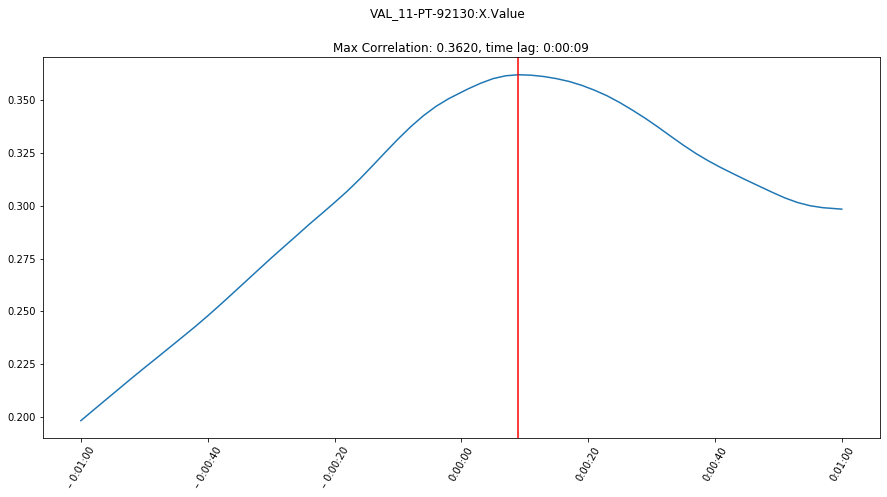

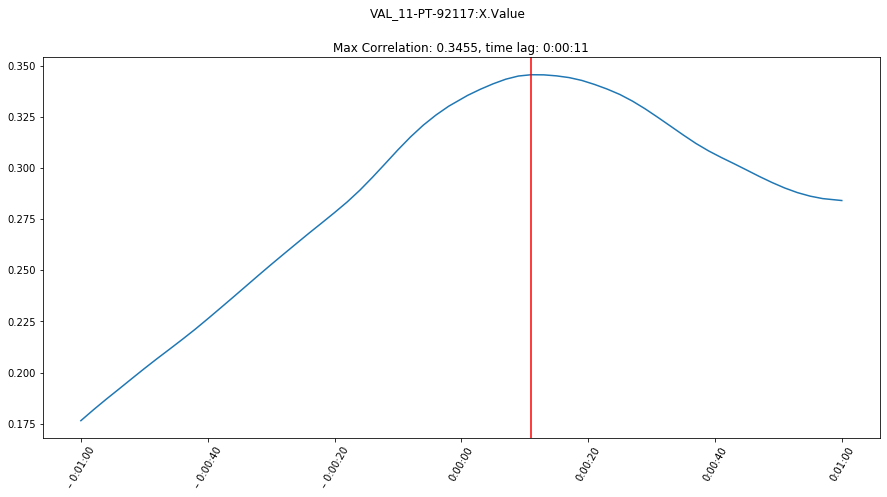

In [23]:
plot_cross_correlations(cross, range(3, 5))


## Cross correlate sine waves


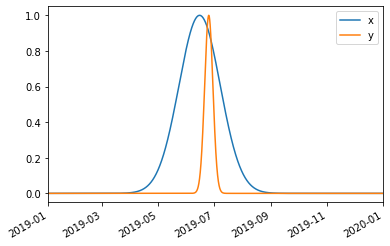

In [63]:
df = pd.DataFrame(index=pd.date_range(datetime(2019, 1, 1), datetime(2020, 1, 1), periods=10000))
f = (df.index - datetime(2019, 6, 15)) / timedelta(days=40) * 2 * np.pi
df['x'] = np.exp(-(f/5)**2)
df['y'] = np.exp(-(f - np.pi/2)**2)
df.plot()


x lags y by 10 days


  col      corr                    lag
0   x  0.999997 0 days 01:45:07.830783
1   y  0.603929 9 days 21:25:11.071106


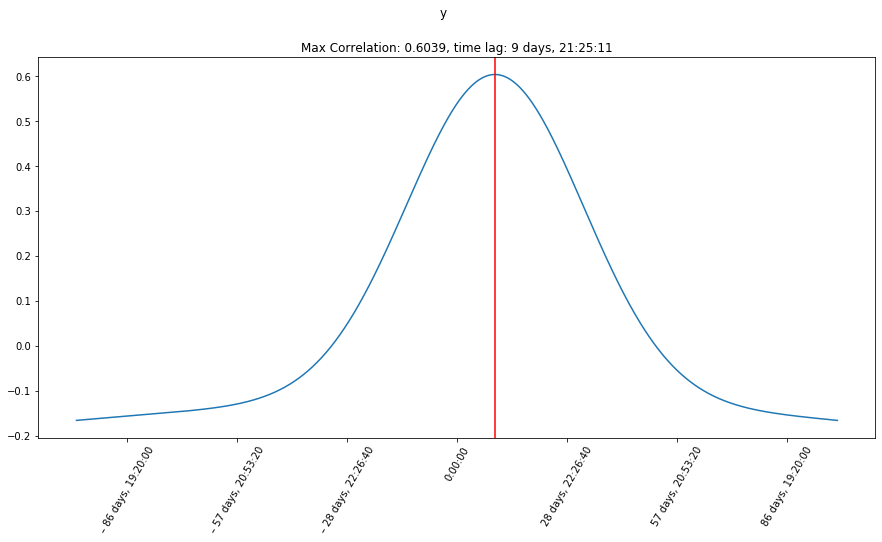

In [66]:
lags = pd.timedelta_range(start=timedelta(days=-100), end=timedelta(days=100), periods=1000)
correlations, cross = cognite.correlation.columns_by_max_cross_correlation(df, 'x', lags, return_cross_correlation_df=True)
print(correlations)
plot_cross_correlations(cross, [1])
